In [94]:
import random

In [95]:
"""
MDP for BlackJack
1) State : 
    * Current Sum
    * dealers shown card
    * Usable ace (Y/N)
2) Actions :
    * stick : stop receiving cards
    * draw : receive another random card
3) Rewards :
    * if stick and ur_sum > dealers_sum -> +1
    * if stick and ur_sum = dealers_sum -> 0
    * if stick then non of above -1
    * if draw and ur_sum > 21 then -1
    * if draw else 0

4) Transition :
    *if ur_sum > 12 draw

"""

class Blackjack():

    def usableAce(self,listofCards):
        if 11 in listofCards:
            return 1
        else : 
            return -1



    def Transition(self):
        """
        The transition function of the game.
        """
        if self.playersSum < 12:
            action = self.draw('player')
            self.Transition()

        if self.playersSum >= 17:
            action = self.stick()

        if self.dealersSum < 17:
            action = self.draw('dealer')
            self.Transition()

        if self.dealersSum >= 17:
            action = self.stick()
      
        
        return action


    def drawCard(self,who):
        """
        Drawing cars, all 10 are for J,Q,K
        11 is for ace.
        """
        cards = [2,3,4,5,6,7,8,9,10,10,10,10,11]
        if who == 'player':
            self.playersCards.append(random.choice(cards))
            if len(self.playersCards) == 1:
                self.playersCards.append(random.choice(cards))
            self.playersSum = sum(self.playersCards)
        else:
            self.dealersCards.append(random.choice(cards))
            if len(self.dealersCards) == 1:
                self.dealersOpen = self.dealersCards[0]
                self.dealersCards.append(random.choice(cards))
            self.dealersSum = sum(self.dealersCards)
        return None


    def draw(self,who):
        self.drawCard(who)
        if self.dealersSum > 21:
            return +1
        if self.playersSum > 21:
            return -1
        else:
            return 0

    def stick(self): 
        if self.playersSum > self.dealersSum:
            return 1
        elif self.playersCards == self.dealersSum:
            return 0
        else:
            return -1
        


    def episode(self):

        #initializations
        self.playersCards = []
        self.playersSum = 0
        self.dealersCards = []
        self.dealersSum = 0
        self.dealersOpen = 0
        #initial state
        self.drawCard('player')
        self.drawCard('dealer')
        #state after player has 2 cards and dealer 1
        self.state = [self.playersSum,self.dealersOpen,self.usableAce(self.playersCards),self.Transition()]
        # print(self.state , )
        return self.state




In [96]:
game = Blackjack()
results = []
for i in range(100000):
    results.append(game.episode())

In [97]:
# print(results)
playersHand = []
dealersOpen = []
ace = []
result = []
for i in results:
    playersHand.append(i[0])
    dealersOpen.append([i[1]])
    ace.append(i[2])   
    result.append(i[3])

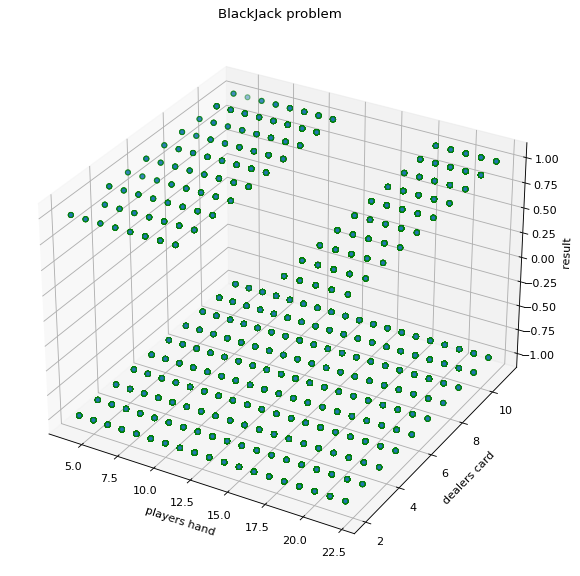

In [98]:
# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(18, 9), dpi=80)
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
z = np.linspace(0, 1, 100)
x = z * np.sin(25 * z)
y = z * np.cos(25 * z)
 
# print(len(playersHand),len(dealersOpen),len(ace))

# plotting
ax.scatter3D(playersHand, dealersOpen, result,  cmap ='viridis', edgecolor ='green')
ax.set_title('BlackJack problem')
ax.set_xlabel('players hand')
ax.set_ylabel('dealers card')
ax.set_zlabel('result')
plt.show()